<a href="https://colab.research.google.com/github/sohamgeek/expt-python-for-data-science-skill-sem-4-/blob/main/skill_expt_7_and_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#expt 7
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer

# Load dataset (Wine Quality from UCI ML Repository)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, delimiter=';')

# Split into features and target
X = data.drop(columns=['quality'])  # Features
y = data['quality']  # Target

# Normalize Data for ANOVA F-Test
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 1️⃣ Apply **ANOVA F-Test** (Numerical Feature Selection)
f_selector = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features
X_f_selected = f_selector.fit_transform(X_scaled, y)
selected_features_f = X.columns[f_selector.get_support()]
print("\n✅ Selected Features using ANOVA F-Test:", list(selected_features_f))

# 2️⃣ Apply **Chi-Square Test** (Categorical Feature Selection)
# Convert continuous features to categorical bins
kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_binned = kbins.fit_transform(X)  # Use original (not scaled) data

chi2_selector = SelectKBest(score_func=chi2, k=5)
X_chi2_selected = chi2_selector.fit_transform(X_binned, y)
selected_features_chi2 = X.columns[chi2_selector.get_support()]
print("\n✅ Selected Features using Chi-Square Test:", list(selected_features_chi2))



✅ Selected Features using ANOVA F-Test: ['volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates', 'alcohol']

✅ Selected Features using Chi-Square Test: ['volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates', 'alcohol']



Feature Importance using Mutual Information:
 alcohol                 0.175274
volatile acidity        0.148144
sulphates               0.108972
total sulfur dioxide    0.087135
density                 0.078484
citric acid             0.063279
fixed acidity           0.058469
free sulfur dioxide     0.050152
chlorides               0.041583
residual sugar          0.021996
pH                      0.016721
dtype: float64


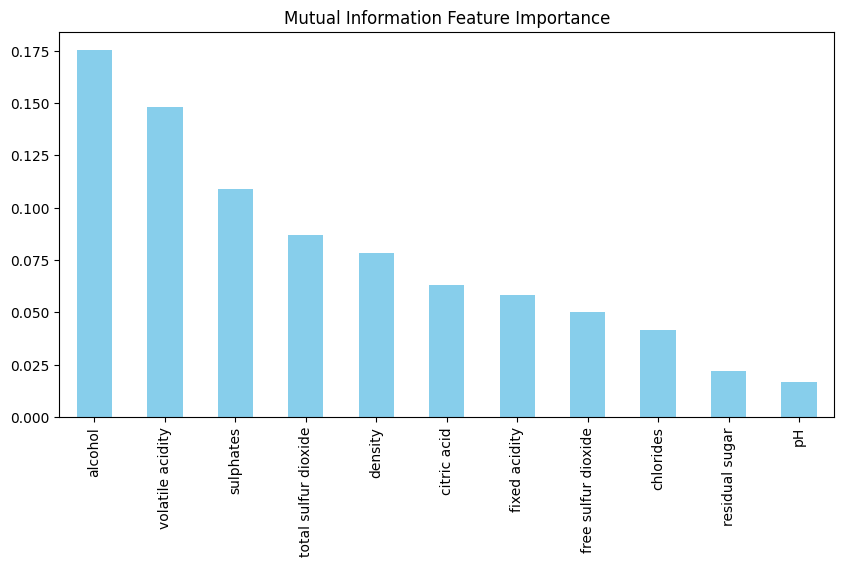


ANOVA F-Test Results:
                  Feature     F-Score       p-Value
10               alcohol  468.267011  2.831477e-91
1       volatile acidity  287.444450  2.051715e-59
9              sulphates  107.740433  1.802088e-24
2            citric acid   86.257726  4.991295e-20
6   total sulfur dioxide   56.657818  8.621703e-14
7                density   50.405223  1.874957e-12
4              chlorides   26.985608  2.313383e-07
0          fixed acidity   24.960038  6.495635e-07
8                     pH    5.340462  2.096278e-02
5    free sulfur dioxide    4.108502  4.283398e-02
3         residual sugar    0.301184  5.832180e-01


In [ ]:
#EXPT 8
from sklearn.feature_selection import mutual_info_regression, f_regression

# 1️⃣ Mutual Information for feature selection
mi_scores = mutual_info_regression(X_scaled, y)
mi_feature_importance = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance using Mutual Information:\n", mi_feature_importance)

# Plot Mutual Information Scores
plt.figure(figsize=(10, 5))
mi_feature_importance.plot(kind='bar', color='skyblue')
plt.title("Mutual Information Feature Importance")
plt.show()

# 2️⃣ ANOVA F-Test for feature selection
f_scores, p_values = f_regression(X_scaled, y)
anova_results = pd.DataFrame({"Feature": X.columns, "F-Score": f_scores, "p-Value": p_values})
anova_results = anova_results.sort_values(by="F-Score", ascending=False)

print("\nANOVA F-Test Results:\n", anova_results)